# Basic dataframe and graphs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    10 non-null     int64 
 1   type    10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


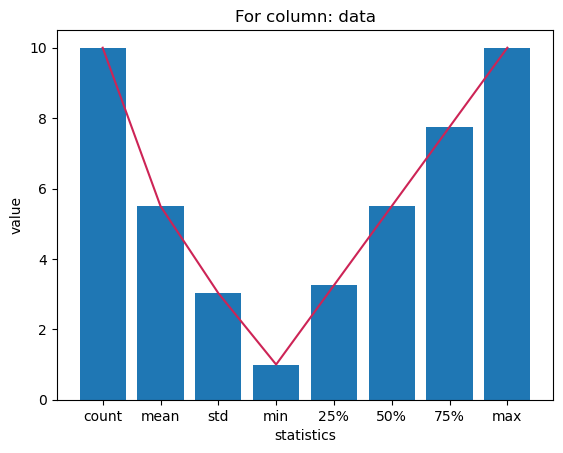

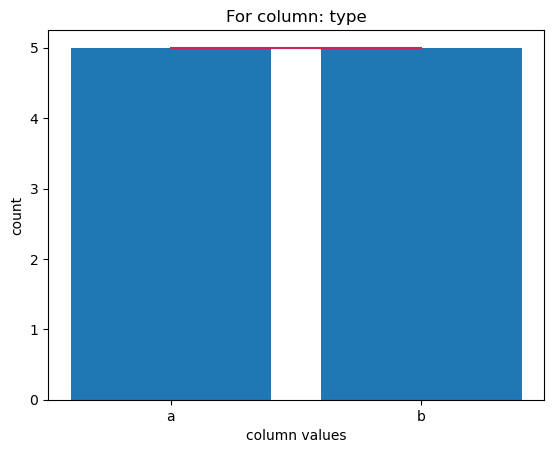

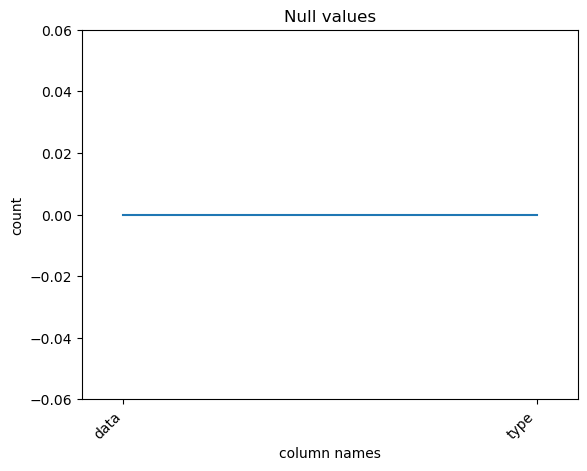

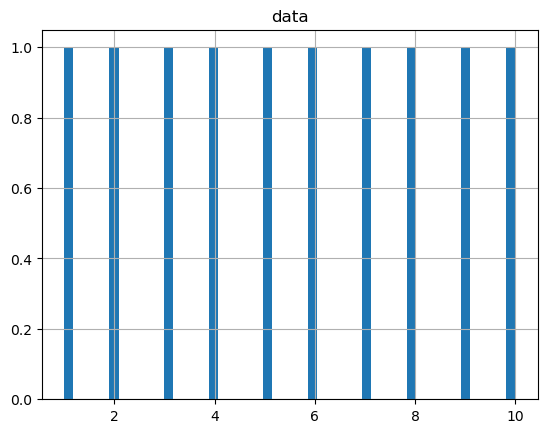

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data = [1,2,3,4,5,6,7,8,9,10]
typer = ["a","b","a","b","a","b","a","b","a","b"]

# make a dataframe
df = pd.DataFrame({'data':data, 'type':typer})

total_columns = df.columns
# store numerical and categorical column in two different variables. It comes in handy during visualisation.
num_col = df._get_numeric_data().columns
cat_col = list(set(total_columns)-set(num_col))

null_df = df.apply(lambda x: sum(x.isnull())).to_frame(name="count")

# get info
df_info = df.info()

# describe
df_dsc = df.describe()

# get unique entries across the dataframe
vals = pd.Series({c: df[c].unique() for c in df})

# plot describe data
for i in num_col:
    if i in ['index']:
        continue
    plt.plot(df_dsc.index,df_dsc[i], color='#CD2456')
    plt.bar(df_dsc.index,df_dsc[i])
    plt.xlabel('statistics')
    plt.ylabel('value')
    plt.title("For column: "+i)
    plt.show()
    
# plot text data
for i in cat_col:
   if i in ['source']:
      continue
   counts = df[i].value_counts()
   plt.plot(counts.index, counts.values, color='#CD2456')
   plt.bar(counts.index, counts.values)
   plt.xlabel('column values')
   plt.ylabel('count')
   plt.title("For column: "+i)
   plt.show()
  
# plot null values
plt.plot(null_df.index, null_df['count'])
plt.xticks(null_df.index, null_df.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.ylabel('count')
plt.title("Null values")
plt.margins(0.1)

# hist
df_hist = df.hist(bins=50)

# add a column for the number of instances
df['number'] = 1
df['row_num'] = df.index

# get cumulative number by type
df['c_number'] = df.groupby(['type'])['data'].cumsum()

# pct calc by type
df['pct_v'] = round((df['data']/df.groupby(['type'])['data'].transform('sum'))*100,2)

# group data by type of data e.g. get all numeric columns
df_numeric = df.select_dtypes(include=np.number)

# remove any duplicates... subset and keep are optional
df = df.drop_duplicates(subset=["data"], keep='first')

# order by df data column
df = df.sort_values(by=['data'], ascending=True)

# rename specific column
df.rename(columns={'pct_v':'pct_t'}, inplace=True)

# new column with previous values +ve for prv, -ve for next
df['prv_data'] = df['data'].shift(1, fill_value=0) # fill_value sets the value if any are NaN or missing

# get top 10 values +1 on the number required
df_top10 = df[0:10]

# filter type to examples containing a
df_a = df[df['type'].str.contains("a")]

# make another, unused dataframe and join the first dataframe onto this second dataframe
df_unused = pd.DataFrame({'col1':data,'col2':[50,50,50,50,50,50,50,50,50,50]})

df_unused = pd.merge(df_unused, df, how="left", left_on=["col1"], right_on=['data'])

# Bar graph

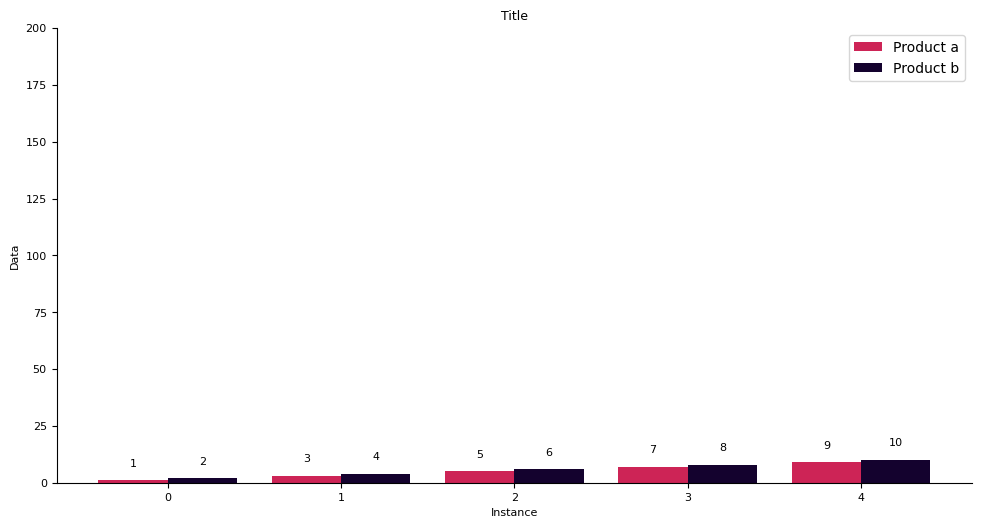

In [2]:
################### bar graph ###############################################
# Initialise a figure. subplots() with no args gives one plot.
fig, ax = plt.subplots()

# Plot each bar plot. Note: manually calculating the 'dodges' of the bars
ax.bar(np.arange(0,len(df.data[df.type=='a'])), df.data[df.type=='a'],0.4, label='Product a', color='#CD2456')
ax.bar(np.arange(0,len(df.data[df.type=='b']))+0.4, df.data[df.type=='b'],0.4, label='Product b', color='#14022E')

for x,y in zip(np.arange(0,len(df.data[df.type=='a'])), df.data[df.type=='a']):

    label = "{}".format(y) #"{:.2f}" 2 decimal places or round(y,0)


    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 rotation='horizontal', fontsize=8) # horizontal alignment can be left, right or center
    
for x,y in zip(np.arange(0,len(df.data[df.type=='b']))+0.4, df.data[df.type=='b']):

    label = "{}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',
                 rotation='horizontal', fontsize=8) # horizontal alignment can be left, right or center

# Customise some display properties
ax.set_ylabel('Data',size=8)
ax.set_ylim(0,200) #(0,max(df.Sales)+10)
#ax.set_yticks(ax.get_yticks().astype(np.int64))
#ax.set_yticklabels(ax.get_yticks().astype(np.int64),rotation='horizontal',size=8)
ax.set_xlabel('Instance',size=8)
ax.set_title('Title',size=9)
ax.set_xticks(np.arange(0,len(df.data[df.type=='a']))+0.2)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(np.arange(0,len(df.data[df.type=='a'])), rotation='horizontal',size=8)
ax.legend(loc='upper left',fontsize=8)
ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
ax.tick_params(axis='y',labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#set size of graph
cmsize=1/2.54
fig.set_size_inches(30*cmsize, 15*cmsize)

#save plot
#plt.savefig(output_folder+'figpath.png', dpi=400, bbox_inches='tight')

# Ask Matplotlib to show the plot
#plt.show()
#plt.close()

# Line graph

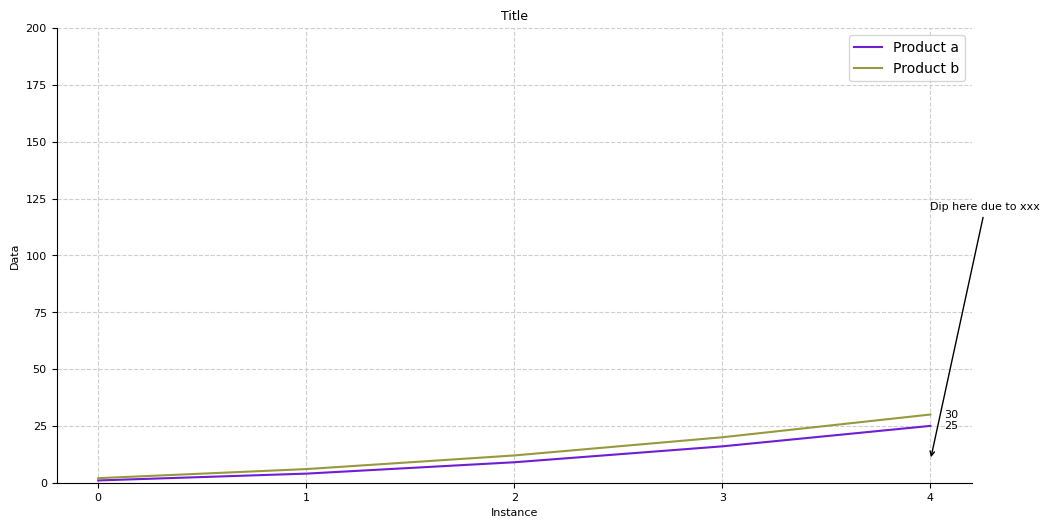

In [3]:
################### line graph ###############################################
# Initialise a figure. subplots() with no args gives one plot.
fig, ax = plt.subplots()

# Plot each bar plot. Note: manually calculating the 'dodges' of the bars
#ax = plt.axes()

#ax.plot(np.arange(0,len(df.data[df.type=='a'])), df.c_number[df.type=='a'], label='Product a', color='#CD2456')
#ax.plot(np.arange(0,len(df.data[df.type=='b'])), df.c_number[df.type=='b'], label='Product b', color='#14022E')

# or to plot multple series:
for i in pd.Series(df['type']).drop_duplicates().tolist():
        try:
           ax.plot(np.arange(0,len(df['data'][df['type']==i])), df['c_number'][df['type']==i], label="Product "+i, color='#'+str(hex(random.randint(0,16777215)))[2:])
        except:
               pass

for value in ax.lines:
    y = value.get_ydata()
    if len(y)>0:
        ax.annotate(f'{y[-1]}',xy=(0.97,y[-1]),xycoords=('axes fraction','data'),ha='left',va='center',size=8)

#add text annotation
ax.annotate("Dip here due to xxx",
            xy=(4, 10), xycoords='data', # arrow tip position
            xytext=(4, 120), textcoords='data', # annotation position
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"), size=8
            )


# Customise some display properties for line graph
ax.set_ylabel('Data',size=8)
ax.set_ylim(0,200) #(0,max(df.Sales)+10)
#ax.set_yticks(ax.get_yticks().astype(np.int64))
#ax.set_yticklabels(ax.get_yticks().astype(np.int64),rotation='horizontal',size=8)
#ax.set_xlim(0,8)
ax.set_xlabel('Instance',size=8)
ax.set_title('Title',size=9)
ax.set_xticks(np.arange(0,len(df.data[df.type=='a'])))    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(np.arange(0,len(df.data[df.type=='a'])), rotation='horizontal',size=8)
#ax.fill(df.Doy[df.Product=='A'],df.Sales[df.Product=='A']-5,df.Sales[df.Product=='A']+5,color='k', alpha=.15)
#ax.set_xticks([])
#ax.set_yticks([])
ax.legend(loc='upper left',fontsize=8)
ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
ax.set_axisbelow(True) # to put gridlines at back
ax.grid(linestyle='--',color='#CECECE')
ax.tick_params(axis='y',labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#set size of graph
cmsize=1/2.54
fig.set_size_inches(30*cmsize, 15*cmsize)

#save plot
#plt.savefig(output_folder+'figpathline.png', dpi=400, bbox_inches='tight')

# Ask Matplotlib to show the plot
#plt.show()
#plt.close()

# Heatmap

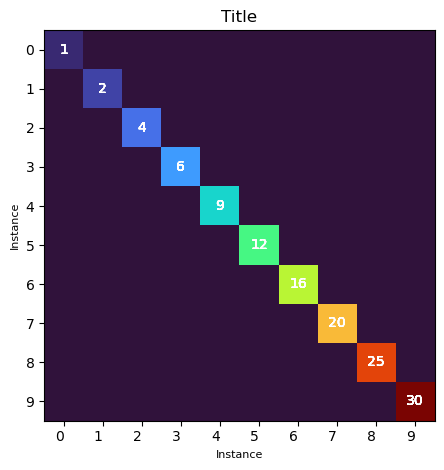

In [4]:
################### heatmap graph ###############################################
# heatmap
pct_mtrx = (df[['number']].T.to_numpy() * df[['c_number']].to_numpy())

#for i, lst in enumerate(pct_mtrx):
#    lst[i] += lst[i]
    
diag = np.einsum('ii->i', pct_mtrx)
# or if a is not guaranteed to be square
# mn = min(a.shape)
# diag = np.einsum('ii->i', a[:mn, :mn])
save = diag.copy()
pct_mtrx[...] = 0
diag[...] = save


fig, ax = plt.subplots()
im = ax.imshow(pct_mtrx, cmap='turbo')

# show all ticks and label them
ax.set_xticks(np.arange(len(df['row_num'])), labels=np.arange(len(df['row_num'])))
ax.set_yticks(np.arange(len(df['row_num'])), labels=df['row_num'])

# rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=0, ha='right', rotation_mode='anchor')

# loop over the data dimensions and create text annotations
for i in range(len(df['row_num'])):
    for j in range(len(df['row_num'])):
        text = ax.text(i,i, int(pct_mtrx[i,i]),
                       ha='center', va='center', color='w')

ax.set_xlabel('Instance',size=8)
ax.set_ylabel('Instance',size=8)        
ax.set_title("Title")
fig.tight_layout()

#save plot
#plt.savefig(output_folder+'figpathline.png', dpi=400, bbox_inches='tight')

# Ask Matplotlib to show the plot
#plt.show()
#plt.close()

# Get boxplot of data

  label  lower_whisker  lower_quartile(<=25%)  median(<=50%)  \
0     a            1.0                    3.0            5.0   
1     b            2.0                    4.0            6.0   

   upper_quartile(<=75%)  upper_whisker  
0                    7.0            9.0  
1                    8.0           10.0  


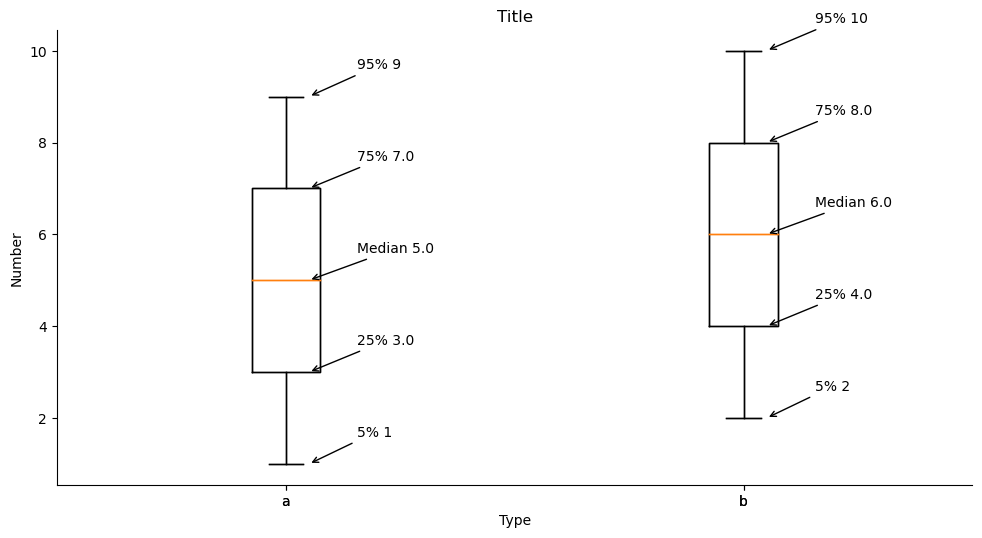

In [5]:
##############################################################################

# get boxplot and details of the data

def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile(<=25%)'] = bp['boxes'][i].get_ydata()[1]
        dict1['median(<=50%)'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile(<=75%)'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

# group by data

labels = df['type'].unique()

collection=[]
for label in labels:
    test = df[df['type']==label]
    collection.append(df['data'][df['type']==label].to_list())

# make list
#for i in range(0,len(labels)):
#    labels[i] = collection[i]

def boxplot_graph(data, labels):
    fig, ax = plt.subplots()
    
    ax.boxplot(x=data, labels=labels, showmeans = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Type',size=10)
    ax.set_ylabel("Number", size=10)
    ax.set_title('Title',size=12)
    
    # annotate graph
    #for x in zip()
    
    #set size of graph
    cmsize=1/2.54
    fig.set_size_inches(30*cmsize, 15*cmsize)
    
    return ax.boxplot(x=data, labels=labels, showmeans = False)

bp = boxplot_graph(collection, labels=labels)

def annotate_boxplot(labels, bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):
    # credit to: https://blog.rtwilson.com/automatically-annotating-a-boxplot-in-matplotlib/
    for i in range(0,len(labels),1):
        if annotate_params is None:
            annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})
    
        plt.annotate('Median '+str(bpdict['medians'][i].get_ydata()[0]), (i + 1 + x_offset, bpdict['medians'][i].get_ydata()[0]), **annotate_params)
        plt.annotate('25% '+str(bpdict['boxes'][i].get_ydata()[0]), (i + 1 + x_offset, bpdict['boxes'][i].get_ydata()[0]), **annotate_params)
        plt.annotate('75% '+str(bpdict['boxes'][i].get_ydata()[2]), (i + 1 + x_offset, bpdict['boxes'][i].get_ydata()[2]), **annotate_params)
        plt.annotate('5% '+str(bpdict['caps'][i*2].get_ydata()[0]), (i + 1 + x_offset, bpdict['caps'][i*2].get_ydata()[0]), **annotate_params)
        plt.annotate('95% '+str(bpdict['caps'][(i*2)+1].get_ydata()[0]), (i + 1 + x_offset, bpdict['caps'][(i*2)+1].get_ydata()[0]), **annotate_params)
        
annotate_boxplot(labels, bp)

print(get_box_plot_data(labels, bp))
t = get_box_plot_data(labels, bp)
plt.show()